In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'G:\\Studies\\AI\\Projects\\Human Activity Recognition'

In [4]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 '01-HAR-EDA.ipynb',
 'HAR_EDA.ipynb',
 'HAR_LSTM.ipynb',
 'HAR_PREDICTION_MODELS.ipynb',
 'HumanActivityRecognition.zip',
 't-sne_perp_10_iter_1000.png',
 't-sne_perp_20_iter_1000.png',
 't-sne_perp_2_iter_1000.png',
 't-sne_perp_50_iter_1000.png',
 't-sne_perp_5_iter_1000.png',
 'UCI_HAR_Dataset']

In [5]:
os.listdir('UCI_HAR_Dataset/')

['.DS_Store',
 'activity_labels.txt',
 'csv_files',
 'features.txt',
 'features_info.txt',
 'README.txt',
 'test',
 'train',
 '_DS_Store']

In [6]:
feature_file = open('UCI_HAR_Dataset/features.txt')
features = [f.split()[1] for f in feature_file.readlines()]
print('Number of features:', len(features))

Number of features: 561


In [7]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [8]:
features = [str(i).replace(')','').replace('(','').replace('-','').replace(',','') for i in features]

In [9]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
5321,0.279211,-0.020208,-0.104406,-0.997367,-0.977223,-0.969768,-0.99789,-0.975288,-0.968216,-0.939127,...,-0.061752,0.045618,-0.109571,-0.901655,-0.93071,0.046425,0.01816,25,4,SITTING


In [10]:
X_train.shape

(7352, 564)

In [11]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = features

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.18156,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS


In [12]:
X_test.shape

(2947, 564)

In [13]:
## Check for duplicates

In [14]:
print('Number of duplicated records in train:', sum(X_train.duplicated()))
print('Number of duplicated records in test:', sum(X_test.duplicated()))

Number of duplicated records in train: 0
Number of duplicated records in test: 0


In [15]:
## Checking for Null values

In [16]:
print('Number of Null elements in train:', X_train.isnull().values.sum())
print('Number of Null elements in test:', X_test.isnull().values.sum())

Number of Null elements in train: 0
Number of Null elements in test: 0


In [17]:
## Check for data balance

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

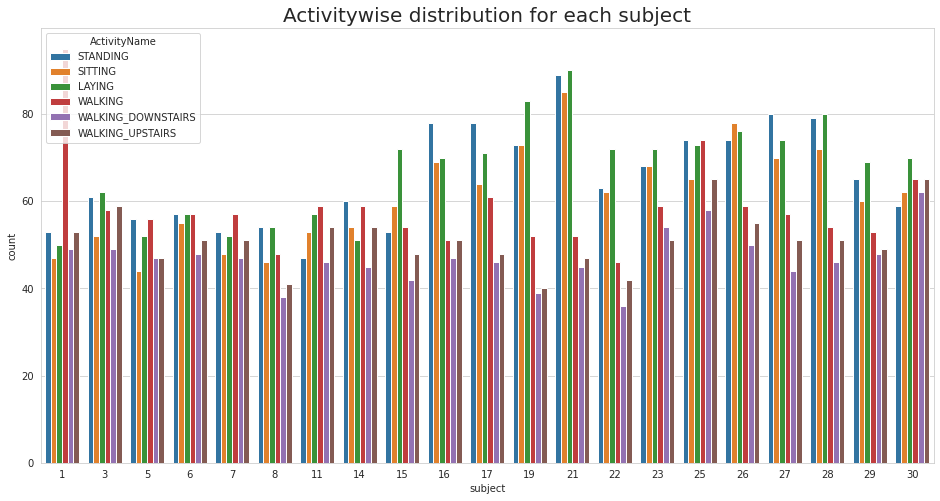

In [20]:
plt.figure(figsize=(16,8))
sns.countplot(x='subject', data=train, hue='ActivityName')
plt.title('Activitywise distribution for each subject', fontsize=20)
plt.show()

##### Observation
> We have almost the same reading for each user

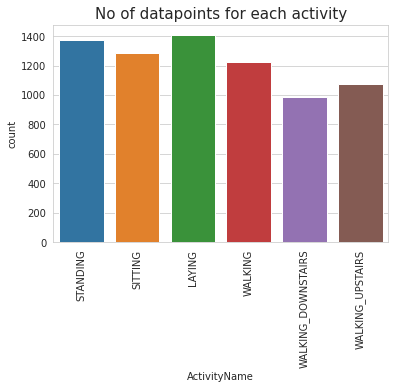

In [21]:
plt.title('No of datapoints for each activity', fontsize=15)
sns.countplot(x='ActivityName', data=train)
plt.xticks(rotation=90)
plt.show()

##### Observation
> Our data is well balanced

In [22]:
train.to_csv('UCI_HAR_Dataset/csv_files/actrain.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/actest.csv', index=False)

In [23]:
## EDA

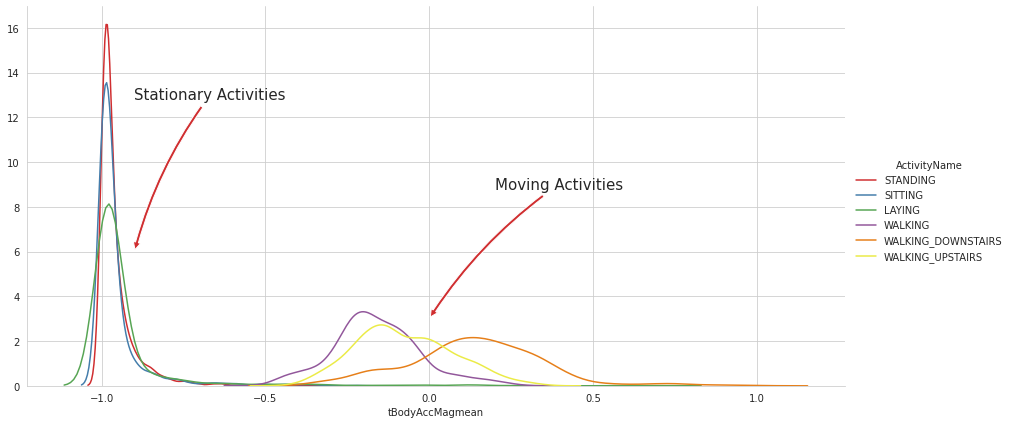

In [24]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.9,6), xytext=(-0.9, 13), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [25]:
df1=train[train['Activity']==1]
df2=train[train['Activity']==2]
df3=train[train['Activity']==3]
df4=train[train['Activity']==4]
df5=train[train['Activity']==5]
df6=train[train['Activity']==6]

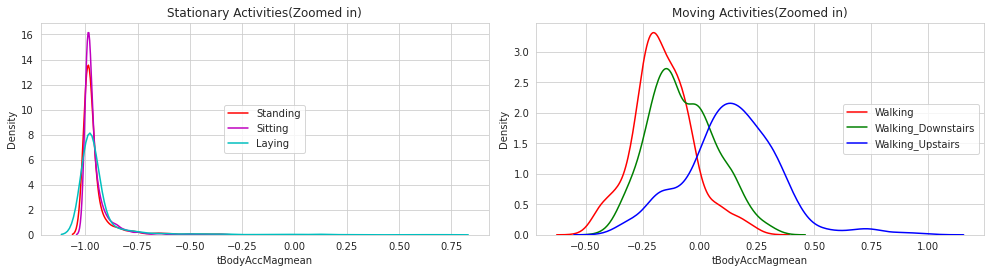

In [26]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'], color='r', hist=False, label='Standing')
sns.distplot(df5['tBodyAccMagmean'], color='m', hist=False, label='Sitting')
sns.distplot(df6['tBodyAccMagmean'], color='c', hist=False, label='Laying')
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities(Zoomed in)')
sns.distplot(df1['tBodyAccMagmean'], color='r', hist=False, label='Walking')
sns.distplot(df2['tBodyAccMagmean'], color='g', hist=False, label='Walking_Downstairs')
sns.distplot(df3['tBodyAccMagmean'], color='b', hist=False, label='Walking_Upstairs')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

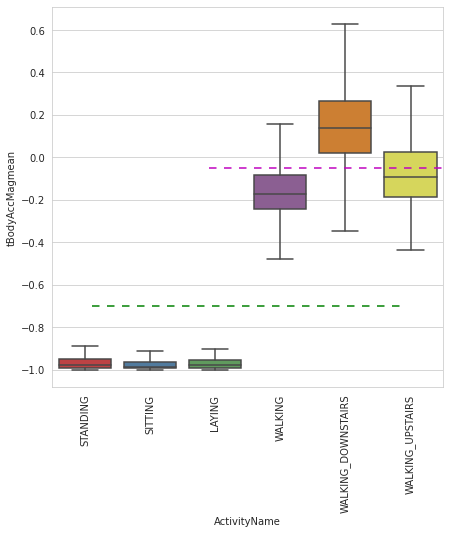

In [27]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean', data=train, showfliers=False)

plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')

plt.xticks(rotation=90)
plt.show()

##### Observations
> - If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
> - If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
> - If tAccMean > 0.0 then the Activity is WalkingDownstairs.
> - We can classify 75% the Acitivity labels with some errors.

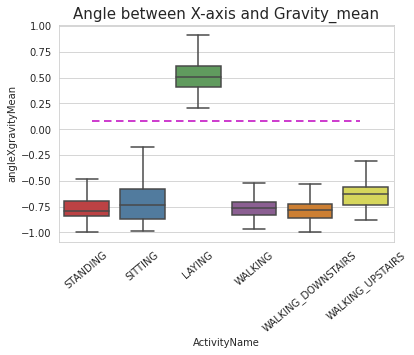

In [29]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

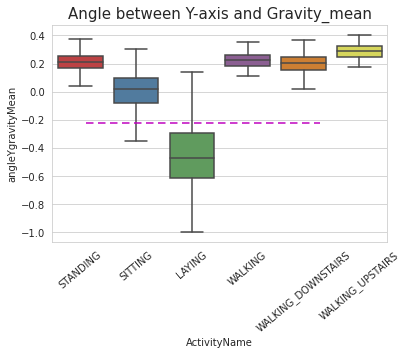

In [30]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

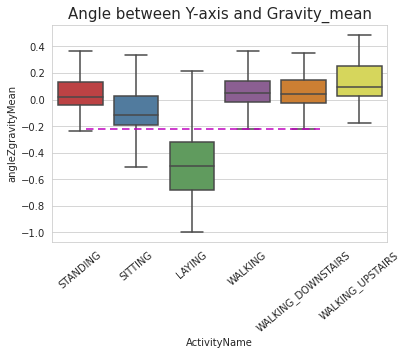

In [31]:
sns.boxplot(x='ActivityName', y='angleZgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

##### Obervations:
> - If angleYgravityMean > 0 then Activity is Laying.
> - We can classify all datapoints belonging to Laying activity with just a single if else statement.

In [33]:
from sklearn.manifold import TSNE

In [34]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o','1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [38]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.434s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.028s
[t-SNE] Iteration 50: error = 124.8033447, gradient norm = 0.0262330 (50 iterations in 1.203s)
[t-SNE] Iteration 100: error = 107.0220947, gradient norm = 0.0289244 (50 iterations in 

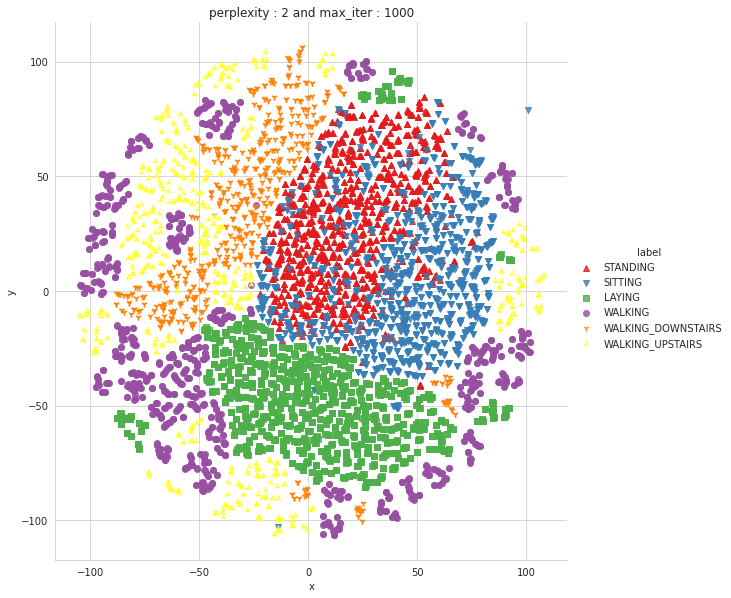

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.534s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.044s
[t-SNE] Iteration 50: error = 113.9604111, gradient norm = 0.0220311 (50 iterations in 1.386s)
[t-SNE] Iteration 100: error = 97.1904297, gradient norm = 0.0143826 (50 iteration

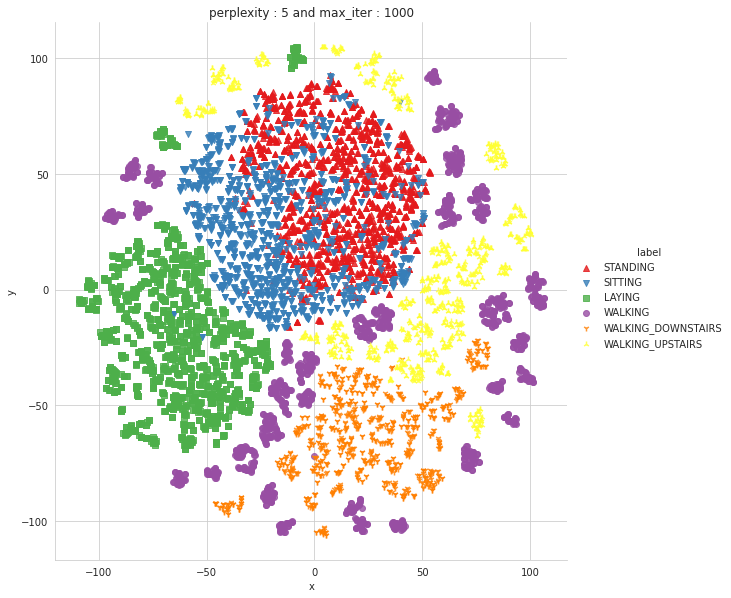

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 1.469s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.084s
[t-SNE] Iteration 50: error = 106.0554352, gradient norm = 0.0153790 (50 iterations in 1.308s)
[t-SNE] Iteration 100: error = 90.5684280, gradient norm = 0.0101929 (50 iteratio

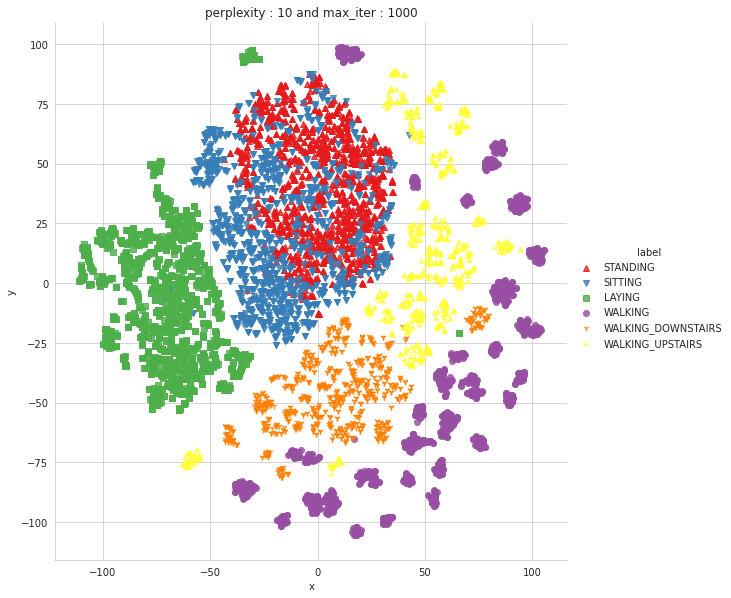

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.510s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.172s
[t-SNE] Iteration 50: error = 97.7309723, gradient norm = 0.0179789 (50 iterations in 1.397s)
[t-SNE] Iteration 100: error = 83.8087769, gradient norm = 0.0056621 (50 iteration

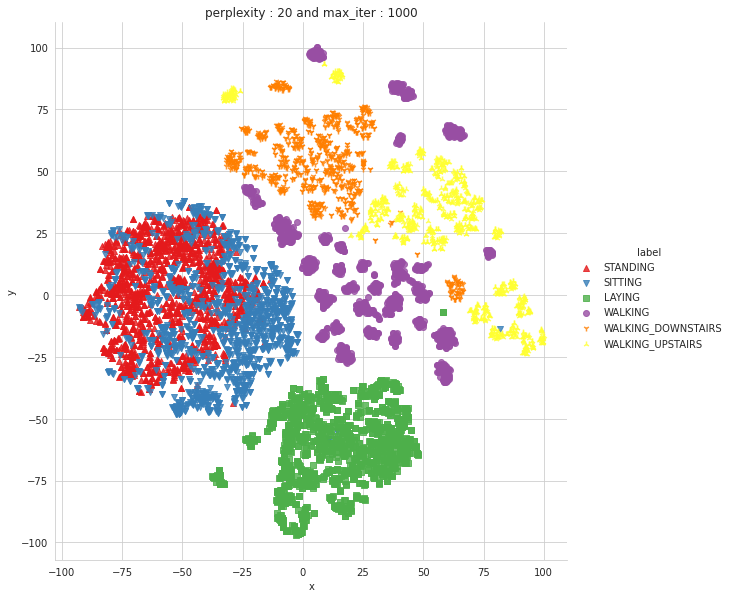

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.626s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.406s
[t-SNE] Iteration 50: error = 85.3098068, gradient norm = 0.0313404 (50 iterations in 1.567s)
[t-SNE] Iteration 100: error = 75.5746536, gradient norm = 0.0042110 (50 iteratio

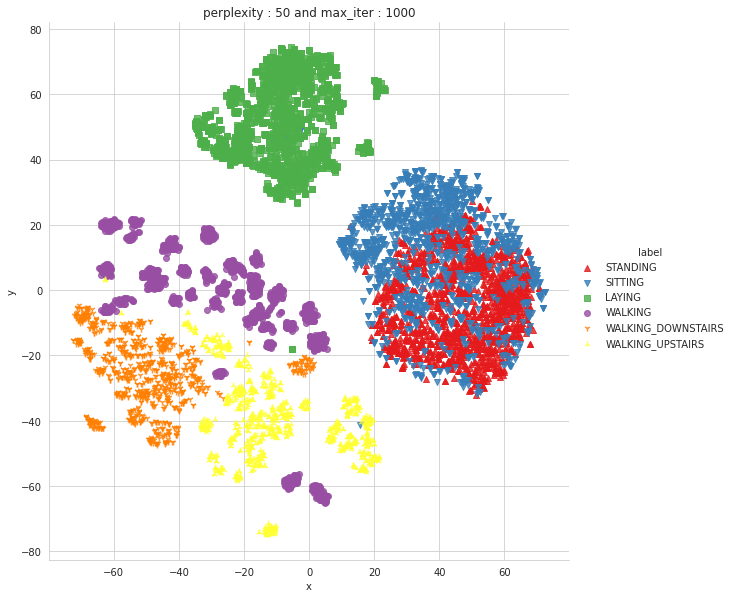

Done


In [39]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])